In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/medical_examination.csv")

In [16]:
# Cleans data and adds overweight column
df["overweight"] = df["weight"] / ((df["height"] / 100) ** 2)
df["overweight"] = df["overweight"].apply(lambda x: 1 if x > 25 else 0)
df["cholesterol"] = df["cholesterol"].apply(lambda x: 1 if x > 1 else 0)
df["gluc"] = df["gluc"].apply(lambda x: 1 if x > 1 else 0)

In [17]:
df_cat = pd.melt(df, id_vars = "cardio", value_vars = ["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


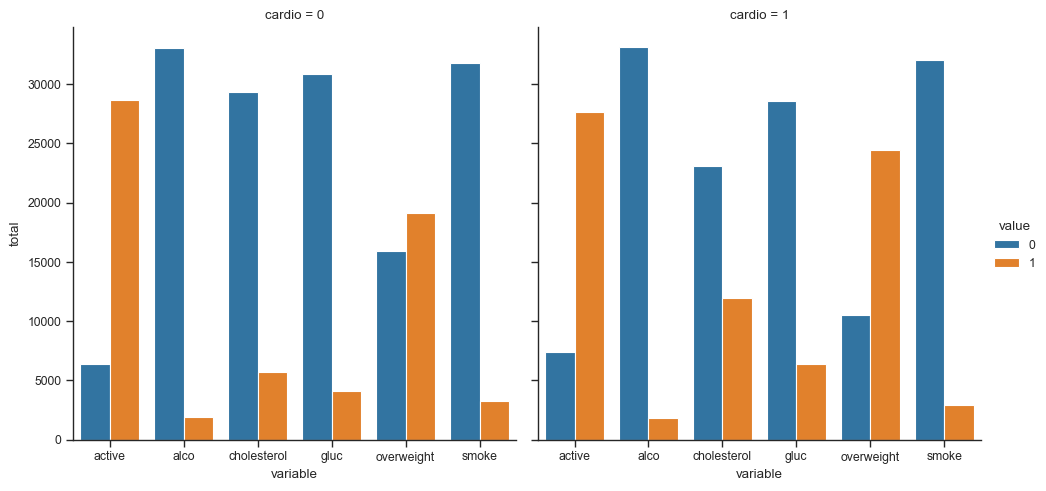

In [18]:
sns.catplot(data = df_cat, x = "variable", hue = "value", kind = "count", col = "cardio", order = ["active", "alco", "cholesterol", "gluc", "overweight", "smoke"]).set(ylabel='total')

In [19]:
# Clean the data. Filter out the following patient segments that represent incorrect data:

    # diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    # height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # height is more than the 97.5th percentile
    # weight is less than the 2.5th percentile
    # weight is more than the 97.5th percentile

In [20]:
df_heat = df[(df["ap_lo"] <= df["ap_hi"]) & (df['height'] >= df['height'].quantile(0.025)) & (df["height"] <= df["height"].quantile(0.975))
  & (df["weight"] >= df["weight"].quantile(0.025)) & (df["weight"] <= df["weight"].quantile(0.975))]
# df_heat.rename(columns = {"sex" : "gender"}, inplace = True)

In [21]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [22]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

<Axes: >

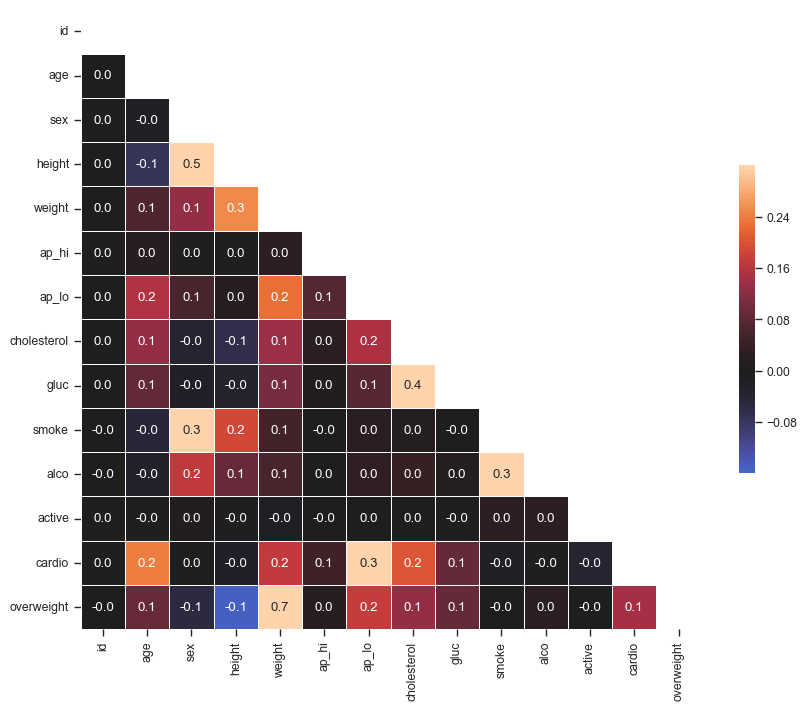

In [23]:

plt.figure(figsize = (10, 10))
sns.set_context("paper")
sns.set_style("ticks")
sns.heatmap(
    corr, annot = True, 
    fmt = ".1f",
    mask = mask,
    square = True,
    linewidth=0.5,
    cmap = "icefire",
    center = 0,
    vmin = -0.16,
    vmax = 0.32,
    cbar_kws={"shrink": .40, "ticks":[0.24, 0.16, 0.08, 0.00, -0.08]})
